<a href="https://colab.research.google.com/github/AniketJoshi24/17_Aniketjoshi/blob/main/Lca3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

--- Initial Data Overview ---
First 5 rows of X:
    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  

First 5 rows of y:
     y
0  no
1  no
2  n

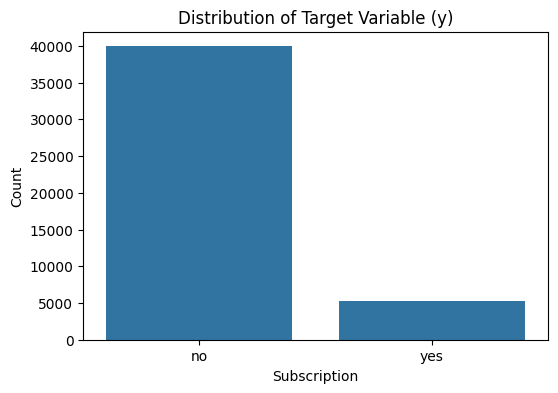

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Initial Data Overview ---")
print("First 5 rows of X:\n", X.head())
print("\nFirst 5 rows of y:\n", y.head())

print("\n--- DataFrame Information ---")
X.info()
y.info()

print("\n--- Descriptive Statistics for Numerical Features ---")
print(X.describe())

print("\n--- Missing Values Check ---")
print("Missing values in X:\n", X.isnull().sum())
print("Missing values in y:\n", y.isnull().sum())

# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=y, x='y')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Feature Selection: 'age', 'balance', and one-hot encoded 'job' columns
job_columns = [col for col in df_combined.columns if col.startswith('job_')]
selected_features = ['age', 'balance'] + job_columns

X_lr = df_combined[selected_features]
y_lr = df_combined['deposit_subscription']

# 2. Split Data
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# 3. Scale Numerical Features
scaler_lr = StandardScaler()
X_train_lr[['age', 'balance']] = scaler_lr.fit_transform(X_train_lr[['age', 'balance']])
X_test_lr[['age', 'balance']] = scaler_lr.transform(X_test_lr[['age', 'balance']])

# 4. Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_lr, y_train_lr)

# 5. Evaluate Model
y_pred_lr = lr_model.predict(X_test_lr)

print("--- Logistic Regression Model Evaluation (Selected Features) ---")
print(f"Accuracy: {accuracy_score(y_test_lr, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test_lr, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test_lr, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test_lr, y_pred_lr):.4f}")

print("\nClassification Report:")
print(classification_report(y_test_lr, y_pred_lr))

--- Logistic Regression Model Evaluation (Selected Features) ---
Accuracy: 0.8791
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043

